# The gender gap in unemployment

Imports and set magics:

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from matplotlib.pyplot import figure

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [82]:
#importing data and removing first 2 rows, as they are empty
unemp = pd.read_excel('/Users/nadahadraoui/Library/CloudStorage/OneDrive-UniversityofCopenhagen/Introduction to programming/Project/projects-2022-team-hjn/dataproject/AULP01.xlsx',skiprows=3, na_filter=False)
industries = pd.read_excel('/Users/nadahadraoui/Library/CloudStorage/OneDrive-UniversityofCopenhagen/Introduction to programming/Project/projects-2022-team-hjn/dataproject/AKU220K.xlsx', na_filter=False)
industry2 = pd.read_excel('/Users/nadahadraoui/Library/CloudStorage/OneDrive-UniversityofCopenhagen/Introduction to programming/Project/projects-2022-team-hjn/dataproject/AKU220K3.xlsx', na_filter=False)

In [83]:
#looking at the data
unemp

,Unnamed: 0,TOT I alt,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,M Mænd,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,K Kvinder,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,,000 Hele landet,084 Region Hovedstaden,085 Region Sjælland,083 Region Syddanmark,082 Region Midtjylland,081 Region Nordjylland,000 Hele landet,084 Region Hovedstaden,085 Region Sjælland,083 Region Syddanmark,082 Region Midtjylland,081 Region Nordjylland,000 Hele landet,084 Region Hovedstaden,085 Region Sjælland,083 Region Syddanmark,082 Region Midtjylland,081 Region Nordjylland
1,2007,3.6,4,3.5,3.3,2.9,4.5,2.9,3.7,2.7,2.6,2.2,3.3,4.4,4.4,4.3,4.2,3.7,5.9
2,2008,2.6,3,2.6,2.4,2.1,3.2,2.4,3,2.4,2.1,1.8,2.7,2.9,3.1,2.8,2.7,2.4,3.7
3,2009,4.8,4.7,4.7,4.8,4.5,5.7,5.5,5.3,5.4,5.4,5.1,6.5,4.1,4.1,3.9,4,3.8,4.8
4,2010,6.1,6,6.2,6.2,5.6,6.6,6.9,6.7,7.2,7.1,6.3,7.7,5.1,5.2,5.1,5.2,4.8,5.5
5,2011,5.9,6,6.2,6.1,5.3,6.3,6.2,6.4,6.4,6.4,5.3,6.6,5.7,5.7,5.9,5.7,5.3,5.9
6,2012,6,6.2,6.2,6.3,5.3,6.1,6.1,6.3,6.2,6.4,5.1,6.1,6,6,6.2,6.2,5.6,6
7,2013,5.8,6,5.8,5.9,5.1,5.6,5.7,6.2,5.8,5.8,4.9,5.6,5.8,5.8,5.9,6,5.3,5.7
8,2014,5,5.3,5,4.9,4.3,5.3,4.8,5.3,4.9,4.7,4,5.2,5.2,5.3,5.1,5.2,4.7,5.4
9,2015,4.5,4.7,4.6,4.6,3.9,5,4.4,4.6,4.4,4.4,3.5,4.8,4.8,4.8,4.7,4.7,4.3,5.3


In [84]:
#Renaming columns
unemp = unemp.rename(columns={"Unnamed: 0": "Years","TOT I alt":"Entire country (All)","Unnamed: 2":"Capital region (All)","Unnamed: 3":"Zealand (All)","Unnamed: 4":"South Denmark (All)","Unnamed: 5":"Mid Jutland (All)","Unnamed: 6":"Northern Jutland (A)", "M Mænd":"Entire Country (M)", "Unnamed: 8":"Capital region (M)","Unnamed: 9":"Zealand (M)","Unnamed: 10":"South Denmark (M)","Unnamed: 11":"Mid Jutland (M)","Unnamed: 12":"Northern Jutland (M)","K Kvinder":"Entire country (W)","Unnamed: 14":"Capital region (W)","Unnamed: 15":"Zealand (W)","Unnamed: 16":"South Denmark (W)","Unnamed: 17":"Mid Jutland (W)","Unnamed: 18":"Northern Jutland (W)"})


In [85]:
#dropping row 0
unemp=unemp.drop(0).head(16)

In [86]:
#Dropping last two rows
unemp.drop(unemp.tail(2).index,inplace=True)


In [87]:
#reseting indices
unemp=unemp.reset_index(level=None, drop=True, inplace=False, col_level=0, col_fill='')

In [ ]:
####plotting unemployment (pct.) for women, men and in total 

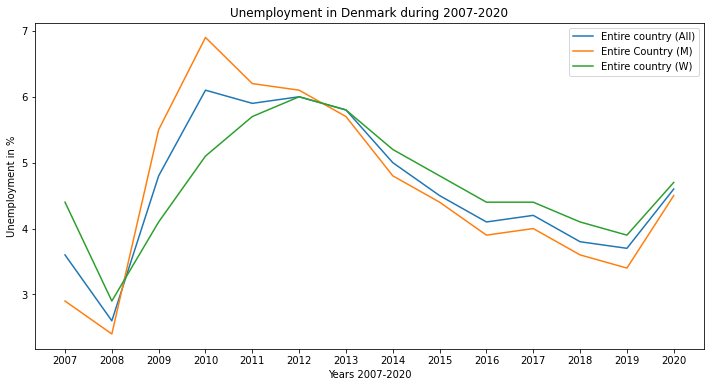

In [88]:
unemp[['Entire country (All)', 'Entire Country (M)', 'Entire country (W)']].plot(figsize=(12,6))
x = list(range(len(unemp["Years"])))
plt.ylabel('Unemployment in %')
plt.xlabel('Years 2007-2020')
plt.xticks(x, unemp["Years"])
plt.title('Unemployment in Denmark during 2007-2020')
plt.show()

We see that unemployment is generally higher for women than men during the period 2007-2008. An exception to this is during the financial crisis and the following years where unemployment for men was higher.  

Looking at dataset for industries. We want to see if the difference in employment rates between women and men can be explained by them working in different industries.

In [ ]:
industry

,"Beskæftigede efter område, branche (DB07 10-grp.), tid og køn",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Enhed: 1.000 personer,,,,,
1,,,2008K1,,2020K1,
2,,,Mænd,Kvinder,Mænd,Kvinder
3,Hele landet,"1 Landbrug, skovbrug og fiskeri",46,17,40,12
4,,"2 Industri, råstofindvinding og forsyningsvirk...",300,130,242,100
5,,3 Bygge og anlæg,178,18,149,14
6,,4 Handel og transport mv.,373,257,386,265
7,,5 Information og kommunikation,74,35,87,29
8,,6 Finansiering og forsikring,42,41,44,37
9,,7 Ejendomshandel og udlejning,20,10,24,14


In [90]:
#Renaming columns
industry = industry.rename(columns={"Unnamed: 1": "Branche","Unnamed: 2":"Mænd, 2008 K1","Unnamed: 3":"Kvinder, 2008 K1","Unnamed: 4":"Mænd, 2020 K2","Unnamed: 5":"Kvinder, 2020 K2"})


In [91]:
#Dropping row 0, 1, 2
industry=industry.drop([0,1,2])


In [92]:
industry = industry.drop('Beskæftigede efter område, branche (DB07 10-grp.), tid og køn', 1)

/var/folders/r2/1xrlyn0x2239x5svpgbg13_m0000gn/T/ipykernel_64062/519451115.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  industry = industry.drop('Beskæftigede efter område, branche (DB07 10-grp.), tid og køn', 1)


In [93]:
#group values
industry_grouped=industry.groupby('Branche').sum()
['Mænd, 2008 K1','Kvinder, 2008 K1']
industry_grouped

,"Mænd, 2008 K1","Kvinder, 2008 K1","Mænd, 2020 K2","Kvinder, 2020 K2"
Branche,,,,
"1 Landbrug, skovbrug og fiskeri",46,17,40,12
"10 Kultur, fritid og anden service",49,73,58,75
"2 Industri, råstofindvinding og forsyningsvirksomhed",300,130,242,100
3 Bygge og anlæg,178,18,149,14
4 Handel og transport mv.,373,257,386,265
5 Information og kommunikation,74,35,87,29
6 Finansiering og forsikring,42,41,44,37
7 Ejendomshandel og udlejning,20,10,24,14
8 Erhvervsservice,107,98,159,127


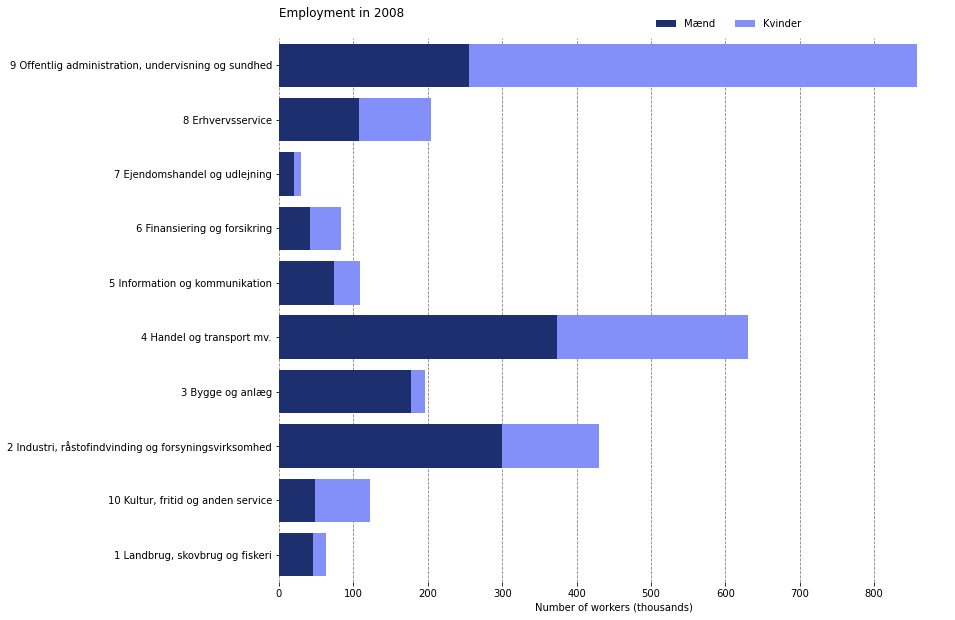

In [95]:
fields = ['Mænd, 2008 K1','Kvinder, 2008 K1']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Mænd','Kvinder']
# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))
# plot bars
left = len(industry_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(industry_grouped.index, industry_grouped[name], left = left, color=colors[idx])
    left = left + industry_grouped[name]
# title, legend, labels
plt.title('Employment in 2008 \n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Number of workers (thousands)')
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

We see that over half of the workers in the public sector are women, whereas men are overrepresentated in the industry and construction sector, which are sectors that are sensitive to business cycles.

In [96]:
#New data set that can give us a better picture of the distribution of workers for men and women
industry2

,"Beskæftigede efter område, køn, tid og branche (DB07 10-grp.)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Enhed: 1.000 personer,,,,,,,,,,,,
1,,,,"1 Landbrug, skovbrug og fiskeri","2 Industri, råstofindvinding og forsyningsvirk...",3 Bygge og anlæg,4 Handel og transport mv.,5 Information og kommunikation,6 Finansiering og forsikring,7 Ejendomshandel og udlejning,8 Erhvervsservice,"9 Offentlig administration, undervisning og su...","10 Kultur, fritid og anden service"
2,Hele landet,Mænd,2008K1,46,300,178,373,74,42,20,107,255,49
3,,,2020K1,40,242,149,386,87,44,24,159,260,58
4,,Kvinder,2008K1,17,130,18,257,35,41,10,98,602,73
5,,,2020K1,12,100,14,265,29,37,14,127,636,75


In [97]:
#Renaming columns
industry2 = industry2.rename(columns={"Unnamed: 1": "Køn","Unnamed: 2":"År","Unnamed: 3":"Landbrug, skovbrug og fiskeri","Unnamed: 4":"Industri, råstofindvinding og forsyningsvirksomhed", "Unnamed: 5":"Bygge og anlæg","Unnamed: 6":"Handel og transport mv.","Unnamed: 7":"Information og kommunikation", "Unnamed: 8":"Finansiering og forsikring", "Unnamed: 9":"Ejendomshandel og udlejning","Unnamed: 10":"Erhvervsservice","Unnamed: 11":"Offentlig administration, undervisning og sundhed","Unnamed: 12":"Kultur, fritid og anden service" })

In [98]:
##dropping row 0 and 1
industry2=industry2.drop([0,1])

In [99]:
#dropping the first column
industry2 = industry2.drop('Beskæftigede efter område, køn, tid og branche (DB07 10-grp.)', 1)


/var/folders/r2/1xrlyn0x2239x5svpgbg13_m0000gn/T/ipykernel_64062/3584892526.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  industry2 = industry2.drop('Beskæftigede efter område, køn, tid og branche (DB07 10-grp.)', 1)


In [100]:
#filling in the empty spaces in column "Køn"
industry2.at[3,'Køn'] = 'Mænd'
industry2.at[5,'Køn'] = 'Kvinder'

In [101]:
industry2

,Køn,År,"Landbrug, skovbrug og fiskeri","Industri, råstofindvinding og forsyningsvirksomhed",Bygge og anlæg,Handel og transport mv.,Information og kommunikation,Finansiering og forsikring,Ejendomshandel og udlejning,Erhvervsservice,"Offentlig administration, undervisning og sundhed","Kultur, fritid og anden service"
2,Mænd,2008K1,46,300,178,373,74,42,20,107,255,49
3,Mænd,2020K1,40,242,149,386,87,44,24,159,260,58
4,Kvinder,2008K1,17,130,18,257,35,41,10,98,602,73
5,Kvinder,2020K1,12,100,14,265,29,37,14,127,636,75


In [102]:
#Merging columns
industry2["Køn og år"]=industry2["Køn"] + industry2["År"]

In [58]:
#Deleting
del industry2['Køn']
del industry2['År']

In [103]:
#group values
industry2_grouped=industry2.groupby('Køn og år').sum()
['Mænd, 2008 K1','Mænd, 2020 K1','Kvinder, 2008 K1','Kvinder, 2008 K1']
industry2_grouped

,Køn,År,"Landbrug, skovbrug og fiskeri","Industri, råstofindvinding og forsyningsvirksomhed",Bygge og anlæg,Handel og transport mv.,Information og kommunikation,Finansiering og forsikring,Ejendomshandel og udlejning,Erhvervsservice,"Offentlig administration, undervisning og sundhed","Kultur, fritid og anden service"
Køn og år,,,,,,,,,,,,
Kvinder2008K1,Kvinder,2008K1,17,130,18,257,35,41,10,98,602,73
Kvinder2020K1,Kvinder,2020K1,12,100,14,265,29,37,14,127,636,75
Mænd2008K1,Mænd,2008K1,46,300,178,373,74,42,20,107,255,49
Mænd2020K1,Mænd,2020K1,40,242,149,386,87,44,24,159,260,58


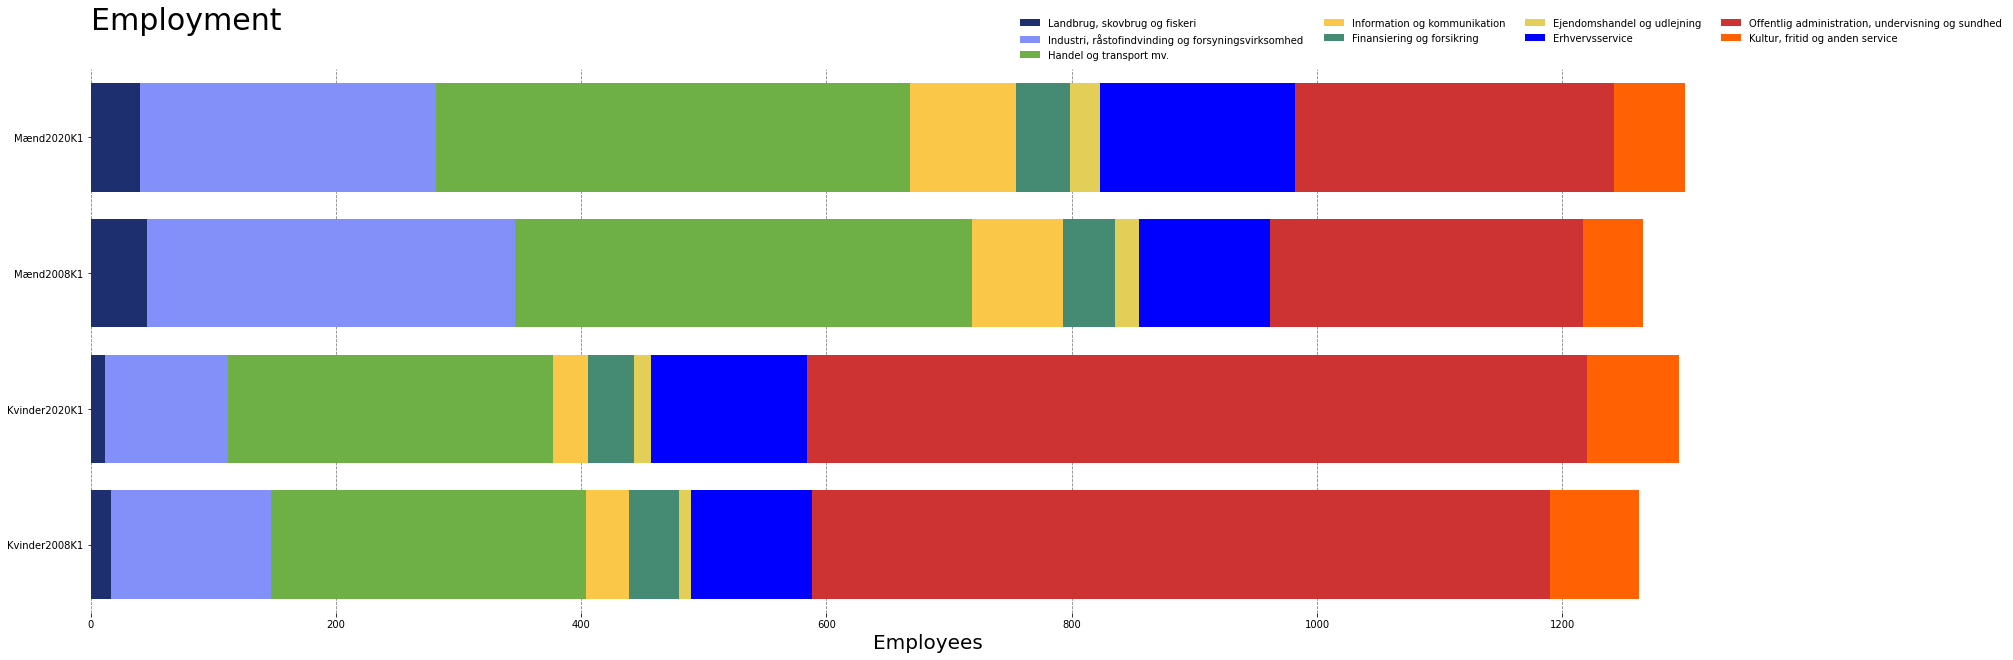

In [104]:
fields = ['Landbrug, skovbrug og fiskeri','Industri, råstofindvinding og forsyningsvirksomhed', 'Handel og transport mv.', 'Information og kommunikation', 'Finansiering og forsikring', 'Ejendomshandel og udlejning', 'Erhvervsservice', 'Offentlig administration, undervisning og sundhed', 'Kultur, fritid og anden service']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','#458B74', '#E3CF57', '#0000FF','#CD3333','#FF6103', '#3D9140']
labels = ['Landbrug, skovbrug og fiskeri','Industri, råstofindvinding og forsyningsvirksomhed', 'Handel og transport mv.', 'Information og kommunikation', 'Finansiering og forsikring', 'Ejendomshandel og udlejning', 'Erhvervsservice', 'Offentlig administration, undervisning og sundhed', 'Kultur, fritid og anden service']
# figure and axis
fig, ax = plt.subplots(1, figsize=(30, 10))
# plot bars
left = len(industry2_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(industry2_grouped.index, industry2_grouped[name], left = left, color=colors[idx])
    left = left + industry2_grouped[name]
# title, legend, labels
plt.title('Employment\n', loc='left',fontsize=30)
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Employees', fontsize=20)
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

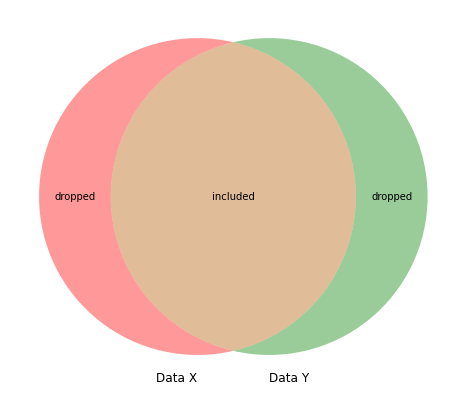

In [ ]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.